Libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Importing data from: https://github.com/BoundlessWay/NMKHDL_FinalProject/blob/data_modeling/Data/number_of_deaths_processed_data.csv

In [5]:
url = r'https://raw.githubusercontent.com/BoundlessWay/NMKHDL_FinalProject/data_modeling/Data/number_of_deaths_processed_data.csv?token=GHSAT0AAAAAACLKDB5G52FYZOJBI63R62MCZMOH32Q'

deaths = pd.read_csv(url)
deaths

,Prematurity,Birth asphyxia and birth trauma,Sepsis and other infectious conditions of the newborn,Congenital anomalies,Injuries,Tuberculosis,Other Group 1 and Other noncommunicable (neonatal and under-5 only),HIV/AIDS,Diarrhoeal diseases,Tetanus,Measles,Meningitis/encephalitis,Malaria,Acute lower respiratory infections,CountryName,Year
0,19333.41926,11691.37210,4489.50404,1534.08344,371.28902,0.0,10579.92644,0.22891,1973.08786,2331.69796,0.0,1395.33839,0.0,6908.05259,Afghanistan,2000
1,14761.72219,10042.87869,2977.92908,1405.50824,130.32201,0.0,3849.14708,30.31433,724.01316,768.57928,0.0,357.27433,0.0,4267.31161,Angola,2000
2,351.16760,110.05251,17.54192,106.22332,4.31283,0.0,30.48989,0.00347,0.77210,0.09764,0.0,10.36631,0.0,36.97242,Albania,2000
3,3.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.0,0.00000,Andorra,2000
4,137.90854,26.85080,2.86905,75.66284,1.78464,0.0,66.57905,0.10435,0.00000,0.00000,0.0,0.15043,0.0,0.09029,United Arab Emirates,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4263,17.45855,5.56010,2.93639,7.28102,0.25978,0.0,4.18806,0.00000,0.00000,0.00000,0.0,0.15554,0.0,1.16055,Samoa,2021
4264,11286.37393,6796.63328,1742.58956,2227.89226,229.08594,0.0,3051.97336,0.90444,521.35998,129.94279,0.0,44.07145,0.0,2523.17301,Yemen,2021
4265,4634.07215,2595.54661,1828.98610,1315.87236,166.21530,0.0,1708.85383,36.14888,0.00000,0.00000,0.0,16.01934,0.0,677.28544,South Africa,2021
4266,6920.62510,4054.12780,912.70245,1274.53105,35.09944,0.0,1776.66284,22.93804,134.08604,23.52546,0.0,108.91078,0.0,1228.79101,Zambia,2021


Splitting features vs. labels:
- Label: Injuries - as in number of death caused by injuries
- Features: all other features

In [6]:
X = deaths.drop(columns = 'Injuries')
Y = deaths['Injuries']
LE = LabelEncoder()
X['CountryName'] = LE.fit_transform(X['CountryName'])

Creating train, test set:

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .3, random_state = 42)

Initializing model:

In [8]:
LR = LinearRegression()
LR.fit(X_train, Y_train)

LinearRegression()

Predicting using the model:

In [9]:
Y_pred = LR.predict(X_test)

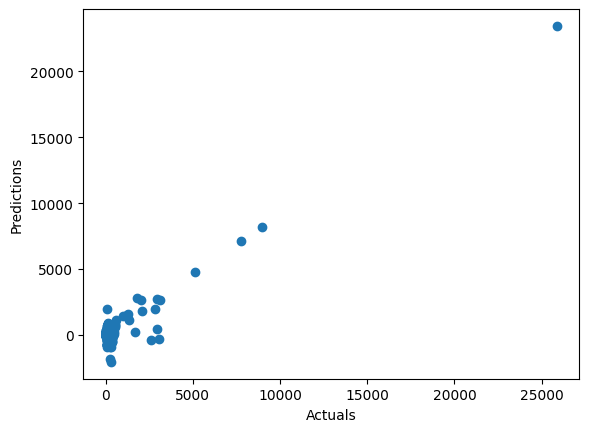

In [10]:
plt.scatter(Y_test, Y_pred)
plt.xlabel("Actuals")
plt.ylabel("Predictions")
plt.show()

Evaluation:

In [12]:
# @title
MSE = mean_squared_error(Y_test, Y_pred)
MSE


61785.429503058826